In [ ]:
#drop player that is out

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [51]:
dates = [
    ['2_4', '2020-02-04'],
    ['2_3', '2020-02-03'],
    ['2_2', '2020-02-02'],
    ['2_1', '2020-02-01'],
    ['1_31', '2020-01-31'],
    ['1_30', '2020-01-30'],
    ['1_29', '2020-01-29'],
    ['1_28', '2020-01-28'],
    ['1_27', '2020-01-27'],
    ['1_26', '2020-01-26'],
    ['1_25', '2020-01-25'],
    ['1_24', '2020-01-24'],
    ['1_23', '2020-01-23'],
    ['1_22', '2020-01-22'],
    ['1_20', '2020-01-20'],
    ['1_19', '2020-01-19'],
    ['1_18', '2020-01-18'],
    ['1_17', '2020-01-17'],
    ['1_16', '2020-01-16'],
    ['1_15', '2020-01-15'],
    ['1_14', '2020-01-14'],
    ['1_13', '2020-01-13'],
    ['1_12', '2020-01-12'],
    ['1_11', '2020-01-11'],
    ['1_10', '2020-01-10'],
    ['1_9', '2020-01-09'],
    ['1_8', '2020-01-08'],
    ['1_7', '2020-01-07'],
    ['1_6', '2020-01-06'],
    ['1_5', '2020-01-05'],
    ['1_4', '2020-01-04'],
    ['1_3', '2020-01-03'],
    ['1_2', '2020-01-02'],
    ['1_1', '2020-01-01'],
    ['12_31', '2019-12-31'],
    ['12_30', '2019-12-30'],
    ['12_29', '2019-12-29'],
    ['12_28', '2019-12-28'],
    ['12_27', '2019-12-27'],
    ['12_26', '2019-12-26'],
    ['12_25', '2019-12-25'],
    ['12_23', '2019-12-23'],
    ['12_22', '2019-12-22'],
    ['12_21', '2019-12-21'],
    ['12_20', '2019-12-20'],
    ['12_19', '2019-12-19'],
    ['12_18', '2019-12-18'],
    ['12_17', '2019-12-17'],
    ['12_16', '2019-12-16'],
    ['12_15', '2019-12-15'],
    ['12_14', '2019-12-14'],
    ['12_13', '2019-12-13'],
    ['12_12', '2019-12-12'],
    ['12_11', '2019-12-11'],
    ['12_10', '2019-12-10'],
    ['12_9', '2019-12-09'],
    ['12_8', '2019-12-08'],
    ['12_7', '2019-12-07'],
    ['12_6', '2019-12-06'],
    ['12_5', '2019-12-05'],
    ['12_4', '2019-12-04'],
    ['12_3', '2019-12-03'],
    ['12_2', '2019-12-02'],
    ['12_1', '2019-12-01'],
    ['11_30', '2019-11-30'],
    ['11_29', '2019-11-29'],
    ['11_27', '2019-11-27'],
    ['11_26', '2019-11-26'],
    ['11_25', '2019-11-25'],
    ['11_24', '2019-11-24'],
    ['11_23', '2019-11-23'],
    ['11_22', '2019-11-22'],
    ['11_21', '2019-11-21'],
    ['11_20', '2019-11-20'],
    ['11_19', '2019-11-19'],
    ['11_18', '2019-11-18'],
    ['11_17', '2019-11-17'],
    ['11_16', '2019-11-16'],
    ['11_15', '2019-11-15'],
    ['11_14', '2019-11-14'],
    ['11_13', '2019-11-13'],
    ['11_12', '2019-11-12'],
    ['11_11', '2019-11-11'],
    ['11_10', '2019-11-10'],
    ['11_9', '2019-11-09'],
    ['11_8', '2019-11-08'],
    ['11_7', '2019-11-07'],
    ['11_6', '2019-11-06'],
    ['11_5', '2019-11-05'],
    ['11_4', '2019-11-04'],
    ['11_3', '2019-11-03'],
    ['11_2', '2019-11-02'],
    ['11_1', '2019-11-01'],
    ['10_31', '2019-10-31'],
    ['10_30', '2019-10-30'],
    ['10_29', '2019-10-29'],
    ['10_28', '2019-10-28'],
    ['10_27', '2019-10-27'],
    ['10_26', '2019-10-26'],
    ['10_25', '2019-10-25'],
    ['10_24', '2019-10-24'],
    ['10_23', '2019-10-23'],
    ['10_22', '2019-10-22'],   
]

drop_attribs = [
        'DFN_PPGProj',
        'FantasyFuelPPGProj',
        'DFN_ValueProj',
        'FantasyFuelValueProj',
        'L2 Min',
        'L5 Min',
        'S Min',
        
]

In [52]:
def reduceForProjectionAnalysis(file):
    file['Avg Proj'] = (file['DFN_PPGProj']+file['FantasyFuelPPGProj'])/2
    file['Avg Value Proj'] = ((file['DFN_ValueProj']+file['FantasyFuelValueProj'])/2)
    file['Avg Skewed Min'] = ((file['L2 Min']+file['L5 Min']+file['S Min'])/3)
    file['Avg Skewed FGA'] = ((file['L2 FGA']+file['L5 FGA']+file['S FGA'])/3)
    file['Avg Skewed FP'] = ((file['L5 FP']+file['S FP']+file['Ceil FP']+file['Floor FP']+file['Avg Proj'])/5)
    file['Avg L5 PPG'] = ((file['L5_ppg_floor']+file['L5_ppg_avg']+file['L5_ppg_max'])/3)
    file.drop(drop_attribs, axis=1, inplace=True)
    file = file[file['injury_status'] != 'O']
    return file

def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def addPlayerOccurences(file):
    file['Selected'] = np.nan
    values = file['Player Name'].value_counts().keys().tolist()
    counts = file['Player Name'].value_counts().tolist()
    for i in range(len(values)):
        file.loc[file['Player Name'] == values[i],['Selected']] = counts[i]
    file['Selected'].fillna(0, inplace=True)
    file = file.reset_index().drop(['Lineup Num', 'Unnamed: 1' ], axis=1)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    return file
    



In [59]:
date = dates[1][1]
file_name = 'BestLineups/{}'.format(date)
best_lineups_file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
df = addPlayerOccurences(dropLowScoringLineups(reduceForProjectionAnalysis(best_lineups_file.copy())))


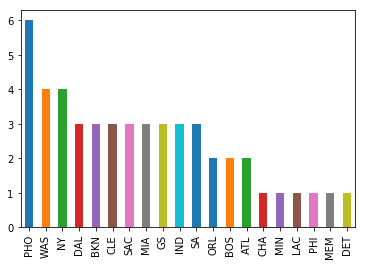

In [60]:
df['team'].value_counts().plot(kind='bar')

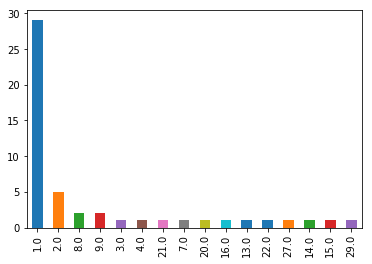

In [61]:
df['Selected'].value_counts().plot(kind='bar')

In [62]:
corr_matrix = df.corr()

In [63]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,spread,over_under,implied_team_score,L5_dvp_rank,L5_ppg_floor,L5_ppg_avg,L5_ppg_max,Salary,Rest,Opp Pace,Opp DEff,L2 FGA,L5 FGA,S FGA,L5 FP,S FP,Floor FP,Ceil FP,Actual Min,Actual FP,Actual Val,DFN_MinProj,Avg Proj,Avg Value Proj,Avg Skewed Min,Avg Skewed FGA,Avg Skewed FP,Avg L5 PPG,Selected
spread,1,0.0798942,-0.417559,-0.00696721,-0.134089,-0.187505,-0.180172,-0.204522,-0.349474,0.236504,-0.24624,-0.118031,-0.217623,-0.228293,-0.200786,-0.191708,-0.224763,-0.162695,-0.102364,-0.0966998,0.0708007,-0.0789215,-0.128765,0.0581907,-0.173965,-0.193566,-0.183751,-0.175982,0.0189879
over_under,0.0798942,1,0.872371,0.0554208,0.0714666,0.0761654,0.0412223,0.0562034,-0.100134,0.771519,0.151247,-0.0563711,0.0986352,0.168292,0.0741785,0.102454,0.051291,0.1397,-0.0181458,0.0314601,0.00812865,-0.0661355,0.0710536,0.0698389,-0.0575792,0.0693216,0.0911584,0.0642733,0.103748
implied_team_score,-0.417559,0.872371,1,0.0527352,0.131992,0.16199,0.126392,0.151925,0.0816513,0.587209,0.258441,0.00742603,0.197522,0.266149,0.166701,0.188029,0.157629,0.207719,0.0345656,0.0767974,-0.0262771,-0.020785,0.128417,0.0358428,0.0334551,0.159019,0.173814,0.145619,0.0847749
L5_dvp_rank,-0.00696721,0.0554208,0.0527352,1,-0.106927,0.0158466,0.0666837,-0.0170321,0.0752265,0.176264,0.3527,-0.0665526,-0.0598603,-0.0542646,0.00964481,-0.00793234,-0.0396416,0.0179452,-0.121478,0.00364502,0.0836486,-0.0381781,0.0271791,0.121081,-0.0707502,-0.0627693,0.00329254,-0.00224038,-0.0633145
L5_ppg_floor,-0.134089,0.0714666,0.131992,-0.106927,1,0.923238,0.770795,0.882216,0.104407,-0.0604433,0.0754755,0.777416,0.848734,0.7763,0.912027,0.843278,0.858812,0.817028,0.598369,0.712106,0.0364463,0.66932,0.842314,0.322544,0.750569,0.832103,0.871719,0.928071,0.176709
L5_ppg_avg,-0.187505,0.0761654,0.16199,0.0158466,0.923238,1,0.936875,0.961058,0.186542,-0.10765,0.0849447,0.830947,0.915564,0.84386,0.99704,0.936851,0.927985,0.927911,0.627851,0.746614,0.0137246,0.727288,0.921603,0.374544,0.83367,0.896962,0.961914,0.994856,0.164438
L5_ppg_max,-0.180172,0.0412223,0.126392,0.0666837,0.770795,0.936875,1,0.887836,0.210725,-0.0887289,0.0187403,0.738902,0.837033,0.770373,0.938794,0.883186,0.852406,0.892049,0.556852,0.680673,-0.00511955,0.664092,0.851937,0.365332,0.766643,0.812145,0.903022,0.950431,0.120501
Salary,-0.204522,0.0562034,0.151925,-0.0170321,0.882216,0.961058,0.887836,1,0.172213,-0.157471,0.0866445,0.828428,0.898201,0.851446,0.963275,0.946463,0.951501,0.926537,0.592773,0.774694,0.00647182,0.697734,0.941241,0.326986,0.798138,0.892513,0.964225,0.949569,0.215632
Rest,-0.349474,-0.100134,0.0816513,0.0752265,0.104407,0.186542,0.210725,0.172213,1,-0.347289,0.240049,0.118431,0.194591,0.29432,0.188709,0.269614,0.265915,0.267848,0.0902944,0.152484,0.0802726,0.178073,0.179219,0.154459,0.264833,0.207453,0.237404,0.178308,-0.0586944
Opp Pace,0.236504,0.771519,0.587209,0.176264,-0.0604433,-0.10765,-0.0887289,-0.157471,-0.347289,1,0.0511574,-0.147532,-0.075562,-0.0153114,-0.118973,-0.106832,-0.143315,-0.077323,-0.111167,-0.0794616,0.0631315,-0.112046,-0.082496,0.0841507,-0.172309,-0.0847038,-0.106348,-0.0900169,0.0869107


In [64]:
df

,Player Name,injury_status,team,opp,spread,over_under,implied_team_score,L5_dvp_rank,L5_ppg_floor,L5_ppg_avg,...,Actual FP,Actual Val,DFN_MinProj,Avg Proj,Avg Value Proj,Avg Skewed Min,Avg Skewed FGA,Avg Skewed FP,Avg L5 PPG,Selected
0,Caris LeVert,NaN,BKN,PHO,-2.5,224.5,113.5,20,11.8,15.6,...,45.8,9.7,28.5,26.95,5.740,22.666667,9.666667,22.81,15.633333,29.0
1,Jimmy Butler,NaN,MIA,PHI,-2.5,212.0,107.3,12,34.8,39.5,...,56.8,7.0,34.5,40.15,4.975,34.333333,13.666667,41.51,41.533333,15.0
2,Mikal Bridges,NaN,PHO,BKN,2.5,224.5,111.0,20,12.0,22.4,...,37.0,8.2,33.5,23.45,5.210,29.666667,6.666667,20.13,21.800000,14.0
3,Kristaps Porzingis,NaN,DAL,IND,5.5,211.5,103.0,12,13.8,33.0,...,59.0,8.4,33.0,41.60,5.960,28.666667,14.333333,37.00,34.266667,27.0
4,Dennis Smith Jr.,NaN,NY,CLE,2.0,215.5,106.8,27,0.8,10.3,...,35.3,9.8,15.5,15.25,4.220,16.333333,6.333333,12.91,10.033333,9.0
5,LaMarcus Aldridge,NaN,SA,LAC,9.0,228.5,109.8,2,21.8,34.9,...,50.3,7.3,33.0,37.40,5.410,33.000000,11.666667,37.06,38.566667,9.0
6,Deandre Ayton,NaN,PHO,BKN,2.5,224.5,111.0,9,30.0,41.0,...,57.8,7.5,35.5,45.15,5.840,34.333333,18.000000,41.79,40.266667,22.0
7,Aaron Gordon,NaN,ORL,CHA,-4.5,202.5,103.5,9,18.5,29.1,...,44.5,7.3,34.0,32.65,5.365,34.000000,15.000000,30.55,28.466667,8.0
8,Alec Burks,NaN,GS,WAS,6.0,235.0,114.5,29,18.5,24.7,...,42.3,8.0,28.0,33.30,6.300,26.333333,11.000000,29.56,23.833333,13.0
9,Brad Wanamaker,NaN,BOS,ATL,-5.0,229.5,117.3,25,-0.5,11.3,...,35.3,9.8,26.0,21.45,5.975,18.333333,5.333333,15.55,12.200000,16.0


In [65]:
best_lineups_file

Player Name injury_status team  opp  spread  \
Lineup Num Unnamed: 1                                                       
0          0                 Caris LeVert           NaN  BKN  PHO    -2.5   
           1                 Jimmy Butler           NaN  MIA  PHI    -2.5   
           2                Mikal Bridges           NaN  PHO  BKN     2.5   
           3           Kristaps Porzingis           NaN  DAL  IND     5.5   
           4             Dennis Smith Jr.           NaN   NY  CLE     2.0   
           5            LaMarcus Aldridge           NaN   SA  LAC     9.0   
           6                Deandre Ayton           NaN  PHO  BKN     2.5   
           7                 Aaron Gordon           NaN  ORL  CHA    -4.5   
1          0                   Alec Burks           NaN   GS  WAS     6.0   
           1               Brad Wanamaker           NaN  BOS  ATL    -5.0   
           2                 Caris LeVert           NaN  BKN  PHO    -2.5   
           3           Kristaps Porzingis           NaN  DAL  IND     5.5   
           4                Mikal Bridges           NaN  PHO  BKN     2.5   
           5                 Bradley Beal           NaN  WAS   GS    -6.0   
           6                Deandre Ayton           NaN  PHO  BKN     2.5   
           7            LaMarcus Aldridge           NaN   SA  LAC     9.0   
2          0                 Caris LeVert           NaN  BKN  PHO    -2.5   
           1                 Jimmy Butler           NaN  MIA  PHI    -2.5   
           2                 Jayson Tatum           NaN  BOS  ATL    -5.0   
           3            LaMarcus Aldridge           NaN   SA  LAC     9.0   
           4             Dennis Smith Jr.           NaN   NY  CLE     2.0   
           5           Kristaps Porzingis           NaN  DAL  IND     5.5   
           6                Deandre Ayton           NaN  PHO  BKN     2.5   
           7                  Jeff Teague           NaN  ATL  BOS     5.0   
3          0                 Caris LeVert           NaN  BKN  PHO    -2.5   
           1                  Jeff Teague           NaN  ATL  BOS     5.0   
           2                 Aaron Gordon           NaN  ORL  CHA    -4.5   
           3           Kristaps Porzingis           NaN  DAL  IND     5.5   
           4                 Jimmy Butler           NaN  MIA  PHI    -2.5   
           5                Mikal Bridges           NaN  PHO  BKN     2.5   
...                                   ...           ...  ...  ...     ...   
37         2                   Wes Iwundu           NaN  ORL  CHA    -4.5   
           3                 Jayson Tatum           NaN  BOS  ATL    -5.0   
           4                   Dante Exum           NaN  CLE   NY    -2.0   
           5                  Jordan Bell           NaN  MIN  SAC     1.0   
           6                 Jakob Poeltl           NaN   SA  LAC     9.0   
           7                Dillon Brooks           NaN  MEM  DET    -9.5   
38         0                   Malik Monk           NaN  CHA  ORL     4.5   
           1                   Damion Lee           NaN   GS  WAS     6.0   
           2                   Wes Iwundu           NaN  ORL  CHA    -4.5   
           3                Cheick Diallo           NaN  PHO  BKN     2.5   
           4              Malcolm Brogdon           NaN  IND  DAL    -5.5   
           5            Derrick Jones Jr.           NaN  MIA  PHI    -2.5   
           6                  Ian Mahinmi           NaN  WAS   GS    -6.0   
           7                 Damian Jones           NaN  ATL  BOS     5.0   
39         0                    Ja Morant           NaN  MEM  DET    -9.5   
           1                 Delon Wright           NaN  DAL  IND     5.5   
           2                 Solomon Hill           NaN  MEM  DET    -9.5   
           3                 Vince Carter           NaN  ATL  BOS     5.0   
           4                  Patty Mills           NaN   SA  LAC     9.0   
           5              